# Deep Convolutional Neural Networks 

In this assignment, we will be using the Keras library to build, train, and evaluate some *relatively simple* Convolutional Neural Networks to demonstrate how adding layers to a network can improve accuracy, yet are more computationally expensive. 

The purpose of this assignment is for you to demonstrate understanding of the appropriate structure of a convolutional neural network and to give you an opportunity to research any parameters or elements of CNNs that you don't fully understand.

We will be using the cifar100 dataset for this assignment, however, in order to keep the dataset size small enough to be trained in a reasonable amount of time in a Google Colab, we will only be looking at two classes from the dataset - cats and dogs.

![CNN Structure Diagram](http://www.ryanleeallred.com/wp-content/uploads/2018/06/CNN-diagram.jpeg)


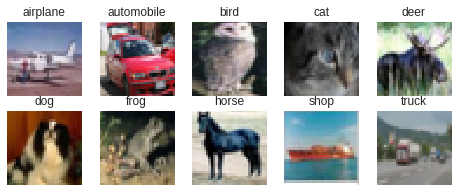

y_train length: 10000
x_train length: 10000
y_test length: 2000
x_test length: 2000


In [0]:
# Import important libraries and methods
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV
from keras import backend as K

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# input image dimensions
img_rows, img_cols = 32, 32   

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

# Important Hyperparameters
batch_size = 32 
num_classes = 2
epochs = 100

# Plot sample image from each cifar10 class.
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','shop','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))     

y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)

x_train = x_train[train_picks]
x_test = x_test[test_picks]

# check for image_data format and format image shape accordingly
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(np.ravel(y_train), num_classes)
y_test = keras.utils.to_categorical(np.ravel(y_test), num_classes)

# Check train and test lengths
print('y_train length:', len(y_train))
print('x_train length:', len(x_train))
print('y_test length:', len(y_test))
print('x_test length:', len(x_test))

# Model #1

This model will be almost as simple as we can make it. It should look something like:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final dropout layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)


Then compile the model using categorical_crossentropy as your loss metric. Use the Adam optimizer, and accuracy as your overall scoring metric. 

If you're lost when you get to this point, make sure you look at the lecture colab for somewhat similar sample code.



In [0]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

np.random.seed(42)

modelfit = model.fit(x_train, y_train, batch_size = 30, epochs = 100, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 308us/step - loss: 0.6825 - acc: 0.5611 - val_loss: 0.6643 - val_acc: 0.6300
Epoch 2/100
10000/10000 [==============================] - 3s 278us/step - loss: 0.6452 - acc: 0.6251 - val_loss: 0.6301 - val_acc: 0.6510
Epoch 3/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.6205 - acc: 0.6583 - val_loss: 0.6149 - val_acc: 0.6675
Epoch 4/100
10000/10000 [==============================] - 3s 280us/step - loss: 0.6097 - acc: 0.6700 - val_loss: 0.5863 - val_acc: 0.6770
Epoch 5/100
 8100/10000 [=======================>......] - ETA: 0s - loss: 0.5919 - acc: 0.6817

10000/10000 [==============================] - 3s 275us/step - loss: 0.5930 - acc: 0.6807 - val_loss: 0.5843 - val_acc: 0.6920
Epoch 6/100
10000/10000 [==============================] - 3s 278us/step - loss: 0.5803 - acc: 0.6944 - val_loss: 0.5753 - val_acc: 0.7000
Epoch 7/100
10000/10000 [==============================] - 3s 286us/step - loss: 0.5668 - acc: 0.7023 - val_loss: 0.5683 - val_acc: 0.6965
Epoch 8/100
10000/10000 [==============================] - 3s 279us/step - loss: 0.5571 - acc: 0.7090 - val_loss: 0.5806 - val_acc: 0.6980
Epoch 9/100
10000/10000 [==============================] - 3s 291us/step - loss: 0.5532 - acc: 0.7102 - val_loss: 0.5636 - val_acc: 0.7005
Epoch 10/100
 2280/10000 [=====>........................] - ETA: 2s - loss: 0.5472 - acc: 0.7079

10000/10000 [==============================] - 3s 282us/step - loss: 0.5407 - acc: 0.7170 - val_loss: 0.5565 - val_acc: 0.7115
Epoch 11/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.5408 - acc: 0.7235 - val_loss: 0.5542 - val_acc: 0.7070
Epoch 12/100
10000/10000 [==============================] - 3s 278us/step - loss: 0.5324 - acc: 0.7288 - val_loss: 0.5588 - val_acc: 0.7100
Epoch 13/100
10000/10000 [==============================] - 3s 275us/step - loss: 0.5252 - acc: 0.7305 - val_loss: 0.5544 - val_acc: 0.7125
Epoch 14/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.5174 - acc: 0.7364 - val_loss: 0.5544 - val_acc: 0.7085
Epoch 15/100
 1860/10000 [====>.........................] - ETA: 2s - loss: 0.5063 - acc: 0.7505

10000/10000 [==============================] - 3s 281us/step - loss: 0.5110 - acc: 0.7450 - val_loss: 0.5502 - val_acc: 0.7200
Epoch 16/100
10000/10000 [==============================] - 3s 277us/step - loss: 0.5065 - acc: 0.7499 - val_loss: 0.5476 - val_acc: 0.7220
Epoch 17/100
10000/10000 [==============================] - 3s 283us/step - loss: 0.5020 - acc: 0.7407 - val_loss: 0.5505 - val_acc: 0.7130
Epoch 18/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.4932 - acc: 0.7491 - val_loss: 0.5475 - val_acc: 0.7225
Epoch 19/100
10000/10000 [==============================] - 3s 276us/step - loss: 0.4897 - acc: 0.7558 - val_loss: 0.5518 - val_acc: 0.7110
Epoch 20/100
 2130/10000 [=====>........................] - ETA: 2s - loss: 0.4509 - acc: 0.7864

10000/10000 [==============================] - 3s 280us/step - loss: 0.4873 - acc: 0.7596 - val_loss: 0.5517 - val_acc: 0.7135
Epoch 21/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.4754 - acc: 0.7611 - val_loss: 0.5469 - val_acc: 0.7165
Epoch 22/100
10000/10000 [==============================] - 3s 280us/step - loss: 0.4770 - acc: 0.7663 - val_loss: 0.5454 - val_acc: 0.7255
Epoch 23/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.4714 - acc: 0.7642 - val_loss: 0.5494 - val_acc: 0.7175
Epoch 24/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.4683 - acc: 0.7672 - val_loss: 0.5564 - val_acc: 0.7160
Epoch 25/100
 2310/10000 [=====>........................] - ETA: 1s - loss: 0.4594 - acc: 0.7658

10000/10000 [==============================] - 3s 274us/step - loss: 0.4642 - acc: 0.7702 - val_loss: 0.5637 - val_acc: 0.7170
Epoch 26/100
10000/10000 [==============================] - 3s 277us/step - loss: 0.4629 - acc: 0.7732 - val_loss: 0.5504 - val_acc: 0.7170
Epoch 27/100
10000/10000 [==============================] - 3s 279us/step - loss: 0.4553 - acc: 0.7747 - val_loss: 0.5516 - val_acc: 0.7245
Epoch 28/100
10000/10000 [==============================] - 3s 280us/step - loss: 0.4573 - acc: 0.7725 - val_loss: 0.5515 - val_acc: 0.7200
Epoch 29/100
10000/10000 [==============================] - 3s 283us/step - loss: 0.4553 - acc: 0.7744 - val_loss: 0.5556 - val_acc: 0.7235
Epoch 30/100
 2100/10000 [=====>........................] - ETA: 2s - loss: 0.4234 - acc: 0.7905

10000/10000 [==============================] - 3s 278us/step - loss: 0.4451 - acc: 0.7841 - val_loss: 0.5583 - val_acc: 0.7140
Epoch 31/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.4400 - acc: 0.7867 - val_loss: 0.5634 - val_acc: 0.7135
Epoch 32/100
10000/10000 [==============================] - 3s 286us/step - loss: 0.4397 - acc: 0.7845 - val_loss: 0.5719 - val_acc: 0.7080
Epoch 33/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.4428 - acc: 0.7788 - val_loss: 0.5530 - val_acc: 0.7105
Epoch 34/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.4358 - acc: 0.7828 - val_loss: 0.5580 - val_acc: 0.7130
Epoch 35/100
 1710/10000 [====>.........................] - ETA: 2s - loss: 0.4453 - acc: 0.7830

10000/10000 [==============================] - 3s 281us/step - loss: 0.4372 - acc: 0.7893 - val_loss: 0.5748 - val_acc: 0.7180
Epoch 36/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.4292 - acc: 0.7879 - val_loss: 0.5706 - val_acc: 0.7190
Epoch 37/100
10000/10000 [==============================] - 3s 277us/step - loss: 0.4301 - acc: 0.7875 - val_loss: 0.5694 - val_acc: 0.7100
Epoch 38/100
10000/10000 [==============================] - 3s 288us/step - loss: 0.4277 - acc: 0.7904 - val_loss: 0.5723 - val_acc: 0.7140
Epoch 39/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.4257 - acc: 0.7883 - val_loss: 0.5627 - val_acc: 0.7160
Epoch 40/100
 1860/10000 [====>.........................] - ETA: 2s - loss: 0.4133 - acc: 0.7984

10000/10000 [==============================] - 3s 288us/step - loss: 0.4181 - acc: 0.7979 - val_loss: 0.5677 - val_acc: 0.7090
Epoch 41/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.4261 - acc: 0.7894 - val_loss: 0.5604 - val_acc: 0.7170
Epoch 42/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.4177 - acc: 0.7951 - val_loss: 0.5762 - val_acc: 0.7155
Epoch 43/100
10000/10000 [==============================] - 3s 286us/step - loss: 0.4258 - acc: 0.7861 - val_loss: 0.5793 - val_acc: 0.7020
Epoch 44/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.4181 - acc: 0.7969 - val_loss: 0.5702 - val_acc: 0.7100
Epoch 45/100
 1890/10000 [====>.........................] - ETA: 2s - loss: 0.4038 - acc: 0.8101

10000/10000 [==============================] - 3s 286us/step - loss: 0.4140 - acc: 0.7990 - val_loss: 0.5842 - val_acc: 0.7080
Epoch 46/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.4126 - acc: 0.7974 - val_loss: 0.5671 - val_acc: 0.7160
Epoch 47/100
10000/10000 [==============================] - 3s 286us/step - loss: 0.4097 - acc: 0.7963 - val_loss: 0.5813 - val_acc: 0.7135
Epoch 48/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.4063 - acc: 0.8023 - val_loss: 0.5892 - val_acc: 0.7125
Epoch 49/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.4103 - acc: 0.7983 - val_loss: 0.5979 - val_acc: 0.7125
Epoch 50/100
 1620/10000 [===>..........................] - ETA: 2s - loss: 0.4461 - acc: 0.7827

10000/10000 [==============================] - 3s 294us/step - loss: 0.4124 - acc: 0.7932 - val_loss: 0.5871 - val_acc: 0.7125
Epoch 51/100
10000/10000 [==============================] - 3s 290us/step - loss: 0.4055 - acc: 0.8007 - val_loss: 0.6042 - val_acc: 0.7130
Epoch 52/100
10000/10000 [==============================] - 3s 288us/step - loss: 0.4103 - acc: 0.7992 - val_loss: 0.5677 - val_acc: 0.7110
Epoch 53/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.4006 - acc: 0.8040 - val_loss: 0.5724 - val_acc: 0.7185
Epoch 54/100
10000/10000 [==============================] - 3s 288us/step - loss: 0.4029 - acc: 0.7999 - val_loss: 0.5876 - val_acc: 0.7140
Epoch 55/100
 1590/10000 [===>..........................] - ETA: 2s - loss: 0.3843 - acc: 0.8170

10000/10000 [==============================] - 3s 292us/step - loss: 0.4027 - acc: 0.8066 - val_loss: 0.5725 - val_acc: 0.7195
Epoch 56/100
10000/10000 [==============================] - 3s 293us/step - loss: 0.4067 - acc: 0.8004 - val_loss: 0.5731 - val_acc: 0.7105
Epoch 57/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.3992 - acc: 0.8028 - val_loss: 0.5826 - val_acc: 0.7130
Epoch 58/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.4034 - acc: 0.8023 - val_loss: 0.5945 - val_acc: 0.7065
Epoch 59/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.3999 - acc: 0.8041 - val_loss: 0.5847 - val_acc: 0.7150
Epoch 60/100
 1410/10000 [===>..........................] - ETA: 2s - loss: 0.3716 - acc: 0.8213

10000/10000 [==============================] - 3s 287us/step - loss: 0.3886 - acc: 0.8096 - val_loss: 0.5984 - val_acc: 0.7140
Epoch 61/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.4003 - acc: 0.8039 - val_loss: 0.5872 - val_acc: 0.7130
Epoch 62/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.3929 - acc: 0.8102 - val_loss: 0.6073 - val_acc: 0.7095
Epoch 63/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.3935 - acc: 0.8065 - val_loss: 0.5983 - val_acc: 0.7155
Epoch 64/100
10000/10000 [==============================] - 3s 290us/step - loss: 0.3922 - acc: 0.8070 - val_loss: 0.5817 - val_acc: 0.7245
Epoch 65/100
 1590/10000 [===>..........................] - ETA: 2s - loss: 0.3841 - acc: 0.8075

10000/10000 [==============================] - 3s 288us/step - loss: 0.3878 - acc: 0.8097 - val_loss: 0.5831 - val_acc: 0.7180
Epoch 66/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.3967 - acc: 0.8047 - val_loss: 0.5889 - val_acc: 0.7160
Epoch 67/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.3920 - acc: 0.8038 - val_loss: 0.5830 - val_acc: 0.7150
Epoch 68/100
10000/10000 [==============================] - 3s 280us/step - loss: 0.3843 - acc: 0.8119 - val_loss: 0.5964 - val_acc: 0.7185
Epoch 69/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.3845 - acc: 0.8079 - val_loss: 0.5985 - val_acc: 0.7185
Epoch 70/100
 1890/10000 [====>.........................] - ETA: 2s - loss: 0.3910 - acc: 0.8011

10000/10000 [==============================] - 3s 283us/step - loss: 0.3812 - acc: 0.8133 - val_loss: 0.6132 - val_acc: 0.7115
Epoch 71/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.3971 - acc: 0.8042 - val_loss: 0.5749 - val_acc: 0.7175
Epoch 72/100
10000/10000 [==============================] - 3s 284us/step - loss: 0.3861 - acc: 0.8152 - val_loss: 0.5995 - val_acc: 0.7060
Epoch 73/100
10000/10000 [==============================] - 3s 277us/step - loss: 0.3845 - acc: 0.8139 - val_loss: 0.5913 - val_acc: 0.7140
Epoch 74/100
10000/10000 [==============================] - 3s 275us/step - loss: 0.3789 - acc: 0.8147 - val_loss: 0.5757 - val_acc: 0.7135
Epoch 75/100
 2250/10000 [=====>........................] - ETA: 2s - loss: 0.3808 - acc: 0.8116

10000/10000 [==============================] - 3s 280us/step - loss: 0.3830 - acc: 0.8117 - val_loss: 0.5902 - val_acc: 0.7070
Epoch 76/100
10000/10000 [==============================] - 3s 286us/step - loss: 0.3842 - acc: 0.8134 - val_loss: 0.5872 - val_acc: 0.7145
Epoch 77/100
10000/10000 [==============================] - 3s 280us/step - loss: 0.3929 - acc: 0.8079 - val_loss: 0.5779 - val_acc: 0.7145
Epoch 78/100
10000/10000 [==============================] - 3s 288us/step - loss: 0.3791 - acc: 0.8156 - val_loss: 0.5839 - val_acc: 0.7060
Epoch 79/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.3775 - acc: 0.8138 - val_loss: 0.5933 - val_acc: 0.7180
Epoch 80/100
 1590/10000 [===>..........................] - ETA: 2s - loss: 0.3619 - acc: 0.8321

10000/10000 [==============================] - 3s 280us/step - loss: 0.3863 - acc: 0.8085 - val_loss: 0.5699 - val_acc: 0.7130
Epoch 81/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.3753 - acc: 0.8188 - val_loss: 0.5919 - val_acc: 0.7185
Epoch 82/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.3765 - acc: 0.8183 - val_loss: 0.5836 - val_acc: 0.7185
Epoch 83/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.3766 - acc: 0.8147 - val_loss: 0.5959 - val_acc: 0.7115
Epoch 84/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.3814 - acc: 0.8114 - val_loss: 0.5873 - val_acc: 0.7165
Epoch 85/100
 1650/10000 [===>..........................] - ETA: 2s - loss: 0.3683 - acc: 0.8188

10000/10000 [==============================] - 3s 285us/step - loss: 0.3738 - acc: 0.8148 - val_loss: 0.6078 - val_acc: 0.7150
Epoch 86/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.3735 - acc: 0.8204 - val_loss: 0.5993 - val_acc: 0.7265
Epoch 87/100
10000/10000 [==============================] - 3s 283us/step - loss: 0.3695 - acc: 0.8209 - val_loss: 0.6043 - val_acc: 0.7150
Epoch 88/100
10000/10000 [==============================] - 3s 285us/step - loss: 0.3748 - acc: 0.8145 - val_loss: 0.5993 - val_acc: 0.7195
Epoch 89/100
10000/10000 [==============================] - 3s 288us/step - loss: 0.3742 - acc: 0.8174 - val_loss: 0.6108 - val_acc: 0.7320
Epoch 90/100
 1650/10000 [===>..........................] - ETA: 2s - loss: 0.3577 - acc: 0.8358

10000/10000 [==============================] - 3s 283us/step - loss: 0.3705 - acc: 0.8176 - val_loss: 0.5977 - val_acc: 0.7175
Epoch 91/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.3732 - acc: 0.8160 - val_loss: 0.5775 - val_acc: 0.7150
Epoch 92/100
10000/10000 [==============================] - 3s 290us/step - loss: 0.3701 - acc: 0.8208 - val_loss: 0.5862 - val_acc: 0.7255
Epoch 93/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.3801 - acc: 0.8106 - val_loss: 0.5877 - val_acc: 0.7150
Epoch 94/100
10000/10000 [==============================] - 3s 287us/step - loss: 0.3716 - acc: 0.8153 - val_loss: 0.6325 - val_acc: 0.7185
Epoch 95/100
 1620/10000 [===>..........................] - ETA: 2s - loss: 0.3749 - acc: 0.8148

10000/10000 [==============================] - 3s 285us/step - loss: 0.3624 - acc: 0.8220 - val_loss: 0.5877 - val_acc: 0.7175
Epoch 96/100
10000/10000 [==============================] - 3s 290us/step - loss: 0.3708 - acc: 0.8170 - val_loss: 0.5877 - val_acc: 0.7270
Epoch 97/100
10000/10000 [==============================] - 3s 290us/step - loss: 0.3777 - acc: 0.8140 - val_loss: 0.5717 - val_acc: 0.7195
Epoch 98/100
10000/10000 [==============================] - 3s 281us/step - loss: 0.3692 - acc: 0.8207 - val_loss: 0.5881 - val_acc: 0.7235
Epoch 99/100
10000/10000 [==============================] - 3s 282us/step - loss: 0.3643 - acc: 0.8229 - val_loss: 0.6048 - val_acc: 0.7235
Epoch 100/100
 1470/10000 [===>..........................] - ETA: 2s - loss: 0.3733 - acc: 0.8116

10000/10000 [==============================] - 3s 283us/step - loss: 0.3650 - acc: 0.8206 - val_loss: 0.6105 - val_acc: 0.7250


## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

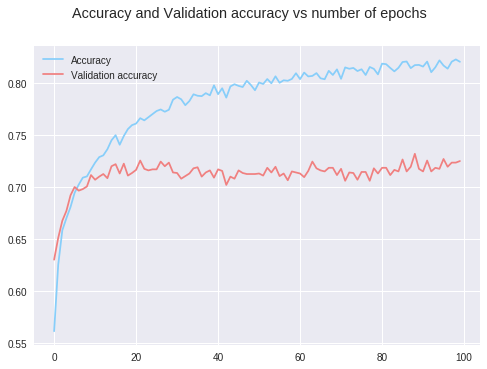

In [0]:
fig, ax = plt.subplots()

ax.plot(modelfit.history['acc'], 'lightskyblue', label='Accuracy')
ax.plot(modelfit.history['val_acc'], 'lightcoral', label='Validation accuracy')
fig.suptitle('Accuracy and Validation accuracy vs number of epochs')
ax.legend()

plt.show()

![something a little deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/a-little-deeper.gif)

# Model #2

Lets add an additional set of convolutional->activation->pooling to this model:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [0]:
model2 = Sequential() 
model2.add(Conv2D(4, (3, 3), activation='relu', input_shape=input_shape)) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape)) 
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

np.random.seed(42)

modelfit2 = model2.fit(x_train, y_train, batch_size = 3000, epochs = 100, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 90us/step - loss: 0.6972 - acc: 0.5030 - val_loss: 0.6923 - val_acc: 0.5195
Epoch 2/100
10000/10000 [==============================] - 0s 38us/step - loss: 0.6926 - acc: 0.5169 - val_loss: 0.6917 - val_acc: 0.5410
Epoch 3/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6908 - acc: 0.5258 - val_loss: 0.6902 - val_acc: 0.5340
Epoch 4/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6898 - acc: 0.5290 - val_loss: 0.6881 - val_acc: 0.5625
Epoch 5/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6869 - acc: 0.5430 - val_loss: 0.6854 - val_acc: 0.6035
Epoch 6/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6836 - acc: 0.5676 - val_loss: 0.6799 - val_acc: 0.5955
Epoch 7/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6786 - acc: 0.5642 - val_loss: 0.6729 - v

10000/10000 [==============================] - 0s 35us/step - loss: 0.6407 - acc: 0.6319 - val_loss: 0.6329 - val_acc: 0.6470
Epoch 18/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6393 - acc: 0.6337 - val_loss: 0.6314 - val_acc: 0.6415
Epoch 19/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6367 - acc: 0.6391 - val_loss: 0.6292 - val_acc: 0.6435
Epoch 20/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.6329 - acc: 0.6421 - val_loss: 0.6260 - val_acc: 0.6440
Epoch 21/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.6296 - acc: 0.6423 - val_loss: 0.6189 - val_acc: 0.6545
Epoch 22/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6253 - acc: 0.6500 - val_loss: 0.6149 - val_acc: 0.6585
Epoch 23/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.6213 - acc: 0.6596 - val_loss: 0.6172 - val_acc: 0.6535
Epoch 24/100
10000/10000 [==============

10000/10000 [==============================] - 0s 36us/step - loss: 0.5995 - acc: 0.6756 - val_loss: 0.5845 - val_acc: 0.6800
Epoch 34/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5974 - acc: 0.6705 - val_loss: 0.5790 - val_acc: 0.6940
Epoch 35/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5950 - acc: 0.6798 - val_loss: 0.5793 - val_acc: 0.6975
Epoch 36/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5978 - acc: 0.6764 - val_loss: 0.5800 - val_acc: 0.6930
Epoch 37/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5940 - acc: 0.6822 - val_loss: 0.5840 - val_acc: 0.6885
Epoch 38/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5945 - acc: 0.6753 - val_loss: 0.5744 - val_acc: 0.6990
Epoch 39/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5876 - acc: 0.6844 - val_loss: 0.5806 - val_acc: 0.6955
Epoch 40/100
10000/10000 [==============

10000/10000 [==============================] - 0s 35us/step - loss: 0.5725 - acc: 0.7002 - val_loss: 0.5633 - val_acc: 0.7075
Epoch 50/100
10000/10000 [==============================] - 0s 37us/step - loss: 0.5718 - acc: 0.6905 - val_loss: 0.5620 - val_acc: 0.7100
Epoch 51/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5728 - acc: 0.6927 - val_loss: 0.5530 - val_acc: 0.7085
Epoch 52/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5696 - acc: 0.6994 - val_loss: 0.5539 - val_acc: 0.7085
Epoch 53/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5657 - acc: 0.7025 - val_loss: 0.5497 - val_acc: 0.7155
Epoch 54/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5670 - acc: 0.6992 - val_loss: 0.5542 - val_acc: 0.7070
Epoch 55/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5670 - acc: 0.7012 - val_loss: 0.5597 - val_acc: 0.7105
Epoch 56/100
10000/10000 [==============

10000/10000 [==============================] - 0s 36us/step - loss: 0.5513 - acc: 0.7122 - val_loss: 0.5368 - val_acc: 0.7235
Epoch 66/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5497 - acc: 0.7152 - val_loss: 0.5364 - val_acc: 0.7270
Epoch 67/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5479 - acc: 0.7174 - val_loss: 0.5415 - val_acc: 0.7185
Epoch 68/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5475 - acc: 0.7131 - val_loss: 0.5384 - val_acc: 0.7205
Epoch 69/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5444 - acc: 0.7192 - val_loss: 0.5314 - val_acc: 0.7320
Epoch 70/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5461 - acc: 0.7195 - val_loss: 0.5280 - val_acc: 0.7235
Epoch 71/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5458 - acc: 0.7165 - val_loss: 0.5287 - val_acc: 0.7270
Epoch 72/100
10000/10000 [==============

10000/10000 [==============================] - 0s 35us/step - loss: 0.5323 - acc: 0.7249 - val_loss: 0.5213 - val_acc: 0.7435
Epoch 82/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5332 - acc: 0.7253 - val_loss: 0.5267 - val_acc: 0.7305
Epoch 83/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5316 - acc: 0.7316 - val_loss: 0.5322 - val_acc: 0.7320
Epoch 84/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5273 - acc: 0.7318 - val_loss: 0.5252 - val_acc: 0.7395
Epoch 85/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5262 - acc: 0.7321 - val_loss: 0.5155 - val_acc: 0.7440
Epoch 86/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5265 - acc: 0.7311 - val_loss: 0.5209 - val_acc: 0.7390
Epoch 87/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5247 - acc: 0.7336 - val_loss: 0.5164 - val_acc: 0.7455
Epoch 88/100
10000/10000 [==============

10000/10000 [==============================] - 0s 35us/step - loss: 0.5119 - acc: 0.7424 - val_loss: 0.5112 - val_acc: 0.7415
Epoch 98/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5112 - acc: 0.7459 - val_loss: 0.5040 - val_acc: 0.7500
Epoch 99/100
10000/10000 [==============================] - 0s 36us/step - loss: 0.5147 - acc: 0.7382 - val_loss: 0.5103 - val_acc: 0.7410
Epoch 100/100
10000/10000 [==============================] - 0s 35us/step - loss: 0.5112 - acc: 0.7404 - val_loss: 0.5068 - val_acc: 0.7465


## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

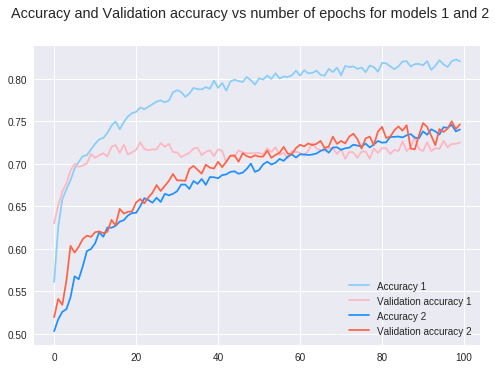

In [0]:
fig, ax = plt.subplots()

ax.plot(modelfit.history['acc'], 'lightskyblue', label='Accuracy 1')
ax.plot(modelfit.history['val_acc'], 'lightpink', label='Validation accuracy 1')
ax.plot(modelfit2.history['acc'], 'dodgerblue', label='Accuracy 2')
ax.plot(modelfit2.history['val_acc'], 'tomato', label='Validation accuracy 2')
fig.suptitle('Accuracy and Validation accuracy vs number of epochs for models 1 and 2')
ax.legend()

plt.show()

![We Need To Go Deeper](http://www.ryanleeallred.com/wp-content/uploads/2018/06/go-deeper.gif)

# Model #3

Finally, one more set of convolutional/activation/pooling:

*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Conv2D - kernel_size = (3,3)
*   Relu Activation
*   Max Pooling - pool_size = (2,2)
*   Dropout - use .25 for all layers but the final layer
---

*   Flatten
*   Fully-Connected (Dense)
*   Dropout - use .5 this time 
*   Fully-Connected (Dense layer where # neurons = # final classes/labels)

Again, compile the model using categorical_crossentropy as your loss metric and use the Adam optimizer, and accuracy as your overall scoring metric. 

In [0]:
model3 = Sequential()

model3.add(Conv2D(4, (3, 3), activation='relu', input_shape=input_shape)) 
model3.add(Conv2D(8, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(16, (3, 3), activation='relu')) 
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), activation='relu')) 
model3.add(Conv2D(128, (3, 3), activation='relu', padding='SAME'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25)) 


model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

np.random.seed(42)

modelfit3 = model3.fit(x_train, y_train, batch_size = 3000, epochs = 100, validation_data=(x_test, y_test), shuffle=True)

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 2s 179us/step - loss: 0.6924 - acc: 0.5077 - val_loss: 0.6918 - val_acc: 0.5365
Epoch 2/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6923 - acc: 0.5169 - val_loss: 0.6908 - val_acc: 0.5445
Epoch 3/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6880 - acc: 0.5628 - val_loss: 0.6844 - val_acc: 0.5660
Epoch 4/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6845 - acc: 0.5496 - val_loss: 0.6845 - val_acc: 0.5650
Epoch 5/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6803 - acc: 0.5652 - val_loss: 0.6768 - val_acc: 0.5845
Epoch 6/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6748 - acc: 0.5857 - val_loss: 0.6656 - val_acc: 0.5890
Epoch 7/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6707 - acc: 0.5918 - val_loss: 0.6695 - 

10000/10000 [==============================] - 0s 44us/step - loss: 0.6403 - acc: 0.6329 - val_loss: 0.6402 - val_acc: 0.6315
Epoch 18/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6345 - acc: 0.6377 - val_loss: 0.6273 - val_acc: 0.6510
Epoch 19/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6329 - acc: 0.6328 - val_loss: 0.6225 - val_acc: 0.6535
Epoch 20/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6323 - acc: 0.6392 - val_loss: 0.6216 - val_acc: 0.6555
Epoch 21/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6210 - acc: 0.6535 - val_loss: 0.6496 - val_acc: 0.6160
Epoch 22/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6245 - acc: 0.6500 - val_loss: 0.6305 - val_acc: 0.6400
Epoch 23/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.6175 - acc: 0.6564 - val_loss: 0.6293 - val_acc: 0.6405
Epoch 24/100
10000/10000 [==============

10000/10000 [==============================] - 0s 44us/step - loss: 0.5870 - acc: 0.6810 - val_loss: 0.5689 - val_acc: 0.6950
Epoch 35/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5837 - acc: 0.6858 - val_loss: 0.5721 - val_acc: 0.6985
Epoch 36/100
10000/10000 [==============================] - 0s 45us/step - loss: 0.6022 - acc: 0.6692 - val_loss: 0.5707 - val_acc: 0.6995
Epoch 37/100
10000/10000 [==============================] - 0s 43us/step - loss: 0.5978 - acc: 0.6696 - val_loss: 0.6151 - val_acc: 0.6520
Epoch 38/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5928 - acc: 0.6782 - val_loss: 0.5697 - val_acc: 0.6975
Epoch 39/100
10000/10000 [==============================] - 0s 43us/step - loss: 0.5835 - acc: 0.6855 - val_loss: 0.5671 - val_acc: 0.6935
Epoch 40/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5797 - acc: 0.6905 - val_loss: 0.5973 - val_acc: 0.6680
Epoch 41/100
10000/10000 [==============

10000/10000 [==============================] - 0s 43us/step - loss: 0.5546 - acc: 0.7088 - val_loss: 0.5465 - val_acc: 0.7185
Epoch 52/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5510 - acc: 0.7162 - val_loss: 0.5593 - val_acc: 0.7030
Epoch 53/100
10000/10000 [==============================] - 0s 45us/step - loss: 0.5505 - acc: 0.7157 - val_loss: 0.5392 - val_acc: 0.7160
Epoch 54/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5446 - acc: 0.7228 - val_loss: 0.5385 - val_acc: 0.7270
Epoch 55/100
10000/10000 [==============================] - 0s 45us/step - loss: 0.5494 - acc: 0.7131 - val_loss: 0.5362 - val_acc: 0.7240
Epoch 56/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5425 - acc: 0.7198 - val_loss: 0.5382 - val_acc: 0.7200
Epoch 57/100
10000/10000 [==============================] - 0s 43us/step - loss: 0.5450 - acc: 0.7170 - val_loss: 0.5233 - val_acc: 0.7320
Epoch 58/100
10000/10000 [==============

10000/10000 [==============================] - 0s 44us/step - loss: 0.5296 - acc: 0.7315 - val_loss: 0.5335 - val_acc: 0.7255
Epoch 68/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5221 - acc: 0.7349 - val_loss: 0.5236 - val_acc: 0.7330
Epoch 69/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5194 - acc: 0.7377 - val_loss: 0.5316 - val_acc: 0.7320
Epoch 70/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5226 - acc: 0.7353 - val_loss: 0.5237 - val_acc: 0.7310
Epoch 71/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5210 - acc: 0.7403 - val_loss: 0.5134 - val_acc: 0.7415
Epoch 72/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5184 - acc: 0.7378 - val_loss: 0.5104 - val_acc: 0.7430
Epoch 73/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5155 - acc: 0.7423 - val_loss: 0.5107 - val_acc: 0.7410
Epoch 74/100
10000/10000 [==============

10000/10000 [==============================] - 0s 44us/step - loss: 0.4968 - acc: 0.7550 - val_loss: 0.5050 - val_acc: 0.7480
Epoch 85/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.5004 - acc: 0.7505 - val_loss: 0.5058 - val_acc: 0.7380
Epoch 86/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.4959 - acc: 0.7559 - val_loss: 0.5006 - val_acc: 0.7475
Epoch 87/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.4940 - acc: 0.7545 - val_loss: 0.5015 - val_acc: 0.7410
Epoch 88/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.4957 - acc: 0.7555 - val_loss: 0.5051 - val_acc: 0.7445
Epoch 89/100
10000/10000 [==============================] - 0s 43us/step - loss: 0.4824 - acc: 0.7590 - val_loss: 0.5006 - val_acc: 0.7470
Epoch 90/100
10000/10000 [==============================] - 0s 44us/step - loss: 0.4873 - acc: 0.7590 - val_loss: 0.5125 - val_acc: 0.7445
Epoch 91/100
10000/10000 [==============

## Fit your model

Fit your model and save it to a new variable so that we can access the .history value to make a plot of our training and validation accuracies by epoch.

## Plot Training and Validation Accuracies

Use your matplotlib skills to give us a nice line graph of both training and validation accuracies as the number of epochs increases. Don't forget your legend, axis and plot title.

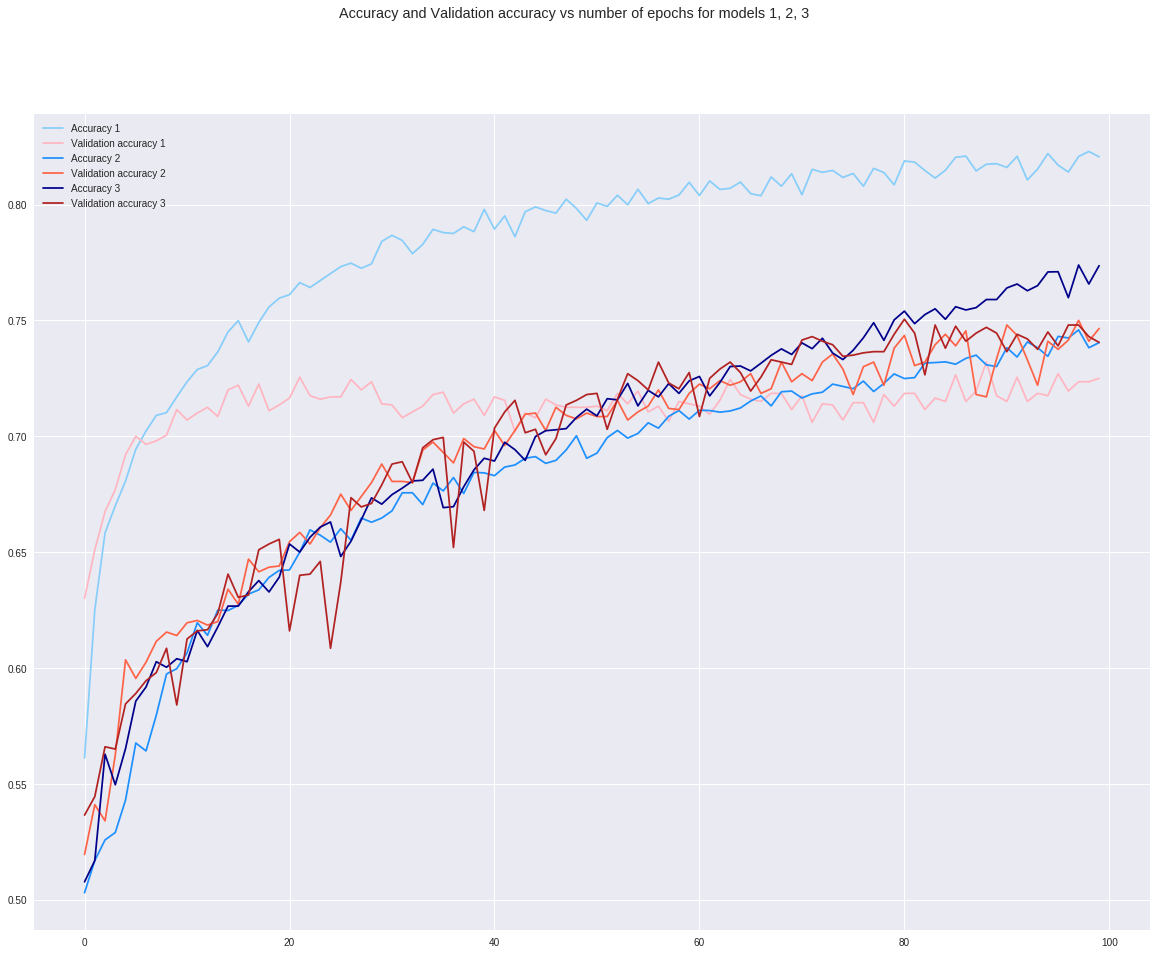

In [0]:
fig, ax = plt.subplots(figsize = (20,15))

ax.plot(modelfit.history['acc'], 'lightskyblue', label='Accuracy 1')
ax.plot(modelfit.history['val_acc'], 'lightpink', label='Validation accuracy 1')
ax.plot(modelfit2.history['acc'], 'dodgerblue', label='Accuracy 2')
ax.plot(modelfit2.history['val_acc'], 'tomato', label='Validation accuracy 2')
ax.plot(modelfit3.history['acc'], 'darkblue', label='Accuracy 3')
ax.plot(modelfit3.history['val_acc'], 'firebrick', label='Validation accuracy 3')
fig.suptitle('Accuracy and Validation accuracy vs number of epochs for models 1, 2, 3')
ax.legend()

plt.show()